# Book Recommendation System 

![Alt Text](books_recs_cover.png)


------------

## Step 1 : Import Libraries and Load Data :

In [4]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Text Handling Libraries
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# let's load the movie dataset :
books = pd.read_csv("E:/book prediction data/data.csv")
print(books.shape)

(6810, 12)


In [6]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9.780000e+12,2005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9.780000e+12,2261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9.780010e+12,6163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9.780010e+12,6178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9.780010e+12,6280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


------------

## Step 2 : Data Overview & Cleaning:

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   float64
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(5), object(7)
memory usage: 638.6+ KB


In [9]:
# Let's see how much null values are there in the dataset:
print('='*40)
print('Null values count in each column :')
print('='*40)
print(books.isnull().sum())
print('='*40)
print('Percentage of null values in each column :')
print('='*40)
for col in books.columns:
    null_count = books[col].isnull().sum()
    total_values = books.shape[0]
    print('{} : {:.2f}%'.format(col,null_count/total_values*100))

Null values count in each column :
isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64
Percentage of null values in each column :
isbn13 : 0.00%
isbn10 : 0.00%
title : 0.00%
subtitle : 65.04%
authors : 1.06%
categories : 1.45%
thumbnail : 4.83%
description : 3.85%
published_year : 0.09%
average_rating : 0.63%
num_pages : 0.63%
ratings_count : 0.63%


### We have 65% null values in subtitle column, which is easily understandable because not all books have subitles.
### We also have 4.8% and 3.8% null values in thumbnail and description column.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Merge the title column with the subtitle :
books['title'] = books['title'].fillna('') + books['subtitle'].fillna('').apply(lambda x: f": {x}" if x else '')

In [13]:
books.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9.780000e+12,2005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9.780000e+12,2261987,Spider's Web: A Novel,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


In [14]:
# drop the subtitle and isbn13 column :
books = books.drop(columns =['subtitle','isbn13'])

In [15]:
# Drop the null values :
books = books.dropna()

In [16]:
books.shape

(6215, 10)

### we had almost 600 rows with missing data

In [18]:
# Check & Remove duplicate books :
duplicates = books.duplicated(subset = ['title','authors']).sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 111


In [19]:
# Drop duplicates and keep the one with the highest 'ratings_count'
books = books.loc[books.groupby(['title', 'authors'])['ratings_count'].idxmax()].reset_index(drop= True)

In [20]:
books.head()

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,310243564,"""A"" is for Abductive: The Language of the Emer...",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003.0,3.17,338.0,48.0
1,801435307,"""Gorgias"" and ""Phaedrus"": Rhetoric, Philosophy...",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998.0,4.41,233.0,15.0
2,393316041,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard Phillips Feynman;Ralph Leighton,Biography & Autobiography,http://books.google.com/books/content?id=ZRoF9...,The Nobel Prize-winning theoretical physicist ...,1985.0,4.28,391.0,105685.0
3,393320928,"""What Do You Care what Other People Think?"": F...",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001.0,4.27,256.0,15646.0
4,1592000673,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003.0,3.52,528.0,29.0


In [21]:
# Check the datatypes of the columns :
books.dtypes

isbn10             object
title              object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object

In [22]:
# Change the datatype of published_year, num_pages and ratings_count into integer:
books['published_year'] = books['published_year'].astype(int)
books['num_pages'] = books['num_pages'].astype(int)
books['ratings_count'] = books['ratings_count'].astype(int)

In [23]:
# Check the datatype again:
books.dtypes

isbn10             object
title              object
authors            object
categories         object
thumbnail          object
description        object
published_year      int32
average_rating    float64
num_pages           int32
ratings_count       int32
dtype: object

## Step 3 : Exploratory Data Analysis:

### Univariate Analysis : 

In [26]:
# Top 10 books by average_rating:
books.sort_values(by='average_rating',ascending=False).head(10)[['title','average_rating','authors','ratings_count']]

,title,average_rating,authors,ratings_count
4630,The Irish Anatomist: A Study of Flann O'Brien,5.00,Keith Donohue,1
2037,Insights: Talks on the Nature of Existence,5.00,Frederick Lenz,1
4292,The Diamond Color Meditation: Color Pathway to...,5.00,John Diamond,5
2256,Lake Orion,5.00,James E. Ingram;Lori Grove,0
1416,"Fanning the Flame: Bible, Cross & Mission : Me...",5.00,Christopher J. H. Wright,1
912,Colossians and Philemon,5.00,Robert McL Wilson,1
1272,Ecuador Nature Guide: Southwest Forests : Sozo...,5.00,Christopher D. Jiggins,1
569,Bill Gates: Computer Legend,5.00,Sara Barton-Wood,0
4194,The Complete Theory Fun Factory,5.00,Katie Elliott;Ian Martin,1
1384,Existential Meditation,4.91,Simon Cleveland,11


### Books with the highest average ratings might not be the top books overall, as they often have only a few ratings, which are mostly perfect scores.

In [28]:
# Top 10 books by ratings_count:
top_10_books = books.sort_values(by='ratings_count',ascending=False).head(10)[['title','ratings_count','authors','average_rating']]

In [29]:
top_10_books

,title,ratings_count,authors,average_rating
1768,Harry Potter and the Sorcerer's Stone (Book 1),5629932,"Rowling, J.K.",4.47
4572,"The Hobbit, Or, There and Back Again",2364968,John Ronald Reuel Tolkien,4.26
1767,Harry Potter and the Prisoner of Azkaban (Book 3),2149872,"Rowling, J.K.",4.55
1762,Harry Potter and the Chamber of Secrets (Book 2),2115562,"Rowling, J.K.",4.41
4404,The Fellowship of the Ring: Being the First Pa...,2009749,J. R. R. Tolkien,4.35
1765,Harry Potter and the Order of the Phoenix (Boo...,1996446,"Rowling, J.K.",4.49
1764,Harry Potter and the Half-Blood Prince (Book 6),1944099,"Rowling, J.K.",4.56
3285,Romeo and Juliet,1811259,William Shakespeare,3.74
3856,The Alchemist,1592632,Paulo Coelho,3.85
3269,Robert Langdon Novels: The Da Vinci Code : a N...,1588890,Dan Brown,3.82


### Top books by ratings count on the other hand are the top books overall , because it have been read and rated by millions of people

In [31]:
# top 3 books by top 10 authors:
top_3_books_per_author = (
    books[books['authors'].isin(top_10_books['authors'])]
    [['title', 'authors', 'ratings_count','average_rating']]
    .sort_values(by=['authors', 'ratings_count'], ascending=[True, False])
    .groupby('authors')
    .head(3)
    .reset_index(drop =True)
)
top_3_books_per_author

,title,authors,ratings_count,average_rating
0,Robert Langdon Novels: The Da Vinci Code : a N...,Dan Brown,1588890,3.82
1,The Da Vinci Code,Dan Brown,13789,3.82
2,Deception Point,Dan Brown,4864,3.70
3,The Fellowship of the Ring: Being the First Pa...,J. R. R. Tolkien,2009749,4.35
4,The Tolkien Reader,J. R. R. Tolkien,4092,3.99
5,The Lord of the Rings,J. R. R. Tolkien,550,4.49
6,"The Hobbit, Or, There and Back Again",John Ronald Reuel Tolkien,2364968,4.26
7,The Fellowship of the Ring: Being the First Pa...,John Ronald Reuel Tolkien,532629,4.52
8,The Hobbit / The Lord of the Rings: The Hobbit...,John Ronald Reuel Tolkien,97731,4.59
9,The Alchemist,Paulo Coelho,1592632,3.85


Text(0.5, 0, 'Rating')

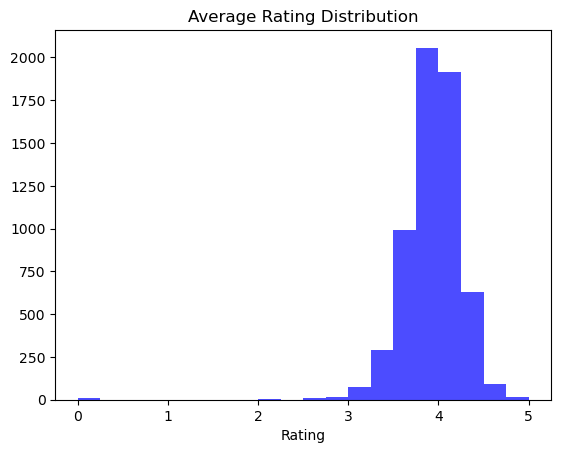

In [32]:
# distribution of average rating :
plt.hist(books['average_rating'], bins=20, color='blue', alpha=0.7)
plt.title("Average Rating Distribution")
plt.xlabel('Rating')

In [33]:
# Categorize the average_rating into 5 bins: 
pd.cut(books['average_rating'],bins=[0,1,2,3,4,5]).value_counts()

average_rating
(3, 4]    3521
(4, 5]    2532
(2, 3]      41
(1, 2]       2
(0, 1]       0
Name: count, dtype: int64

In [34]:
# Categorize the average_rating into 5 bins: 
pd.cut(books['ratings_count'],bins=[0, 1_200_000, 2_400_000, 3_600_000, 4_800_000, 6_000_000]).value_counts()

ratings_count
(0, 1200000]          6069
(1200000, 2400000]      13
(4800000, 6000000]       1
(2400000, 3600000]       0
(3600000, 4800000]       0
Name: count, dtype: int64

In [35]:
# Books with ratings count greater than 1 Million:
books[books['ratings_count']>1000000].sort_values(by='ratings_count',ascending=False)[['title','authors','categories','ratings_count']].reset_index(drop=True)

,title,authors,categories,ratings_count
0,Harry Potter and the Sorcerer's Stone (Book 1),"Rowling, J.K.",Juvenile Fiction,5629932
1,"The Hobbit, Or, There and Back Again",John Ronald Reuel Tolkien,Juvenile Fiction,2364968
2,Harry Potter and the Prisoner of Azkaban (Book 3),"Rowling, J.K.",Juvenile Fiction,2149872
3,Harry Potter and the Chamber of Secrets (Book 2),"Rowling, J.K.",Juvenile Fiction,2115562
4,The Fellowship of the Ring: Being the First Pa...,J. R. R. Tolkien,Fiction,2009749
5,Harry Potter and the Order of the Phoenix (Boo...,"Rowling, J.K.",Juvenile Fiction,1996446
6,Harry Potter and the Half-Blood Prince (Book 6),"Rowling, J.K.",Juvenile Fiction,1944099
7,Romeo and Juliet,William Shakespeare,Drama,1811259
8,The Alchemist,Paulo Coelho,Fiction,1592632
9,Robert Langdon Novels: The Da Vinci Code : a N...,Dan Brown,Art museum curators,1588890


### Most of the highly rated books are from Juvenile Fiction or Fiction genre.

Text(0.5, 0, 'Page Count')

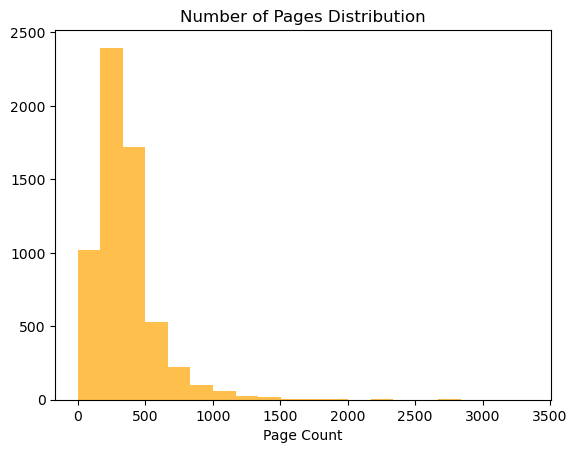

In [37]:
# distribution of page count :
plt.hist(books['num_pages'], bins=20, color='orange', alpha=0.7)
plt.title("Number of Pages Distribution")
plt.xlabel('Page Count')

Text(0.5, 0, 'Publishing Year')

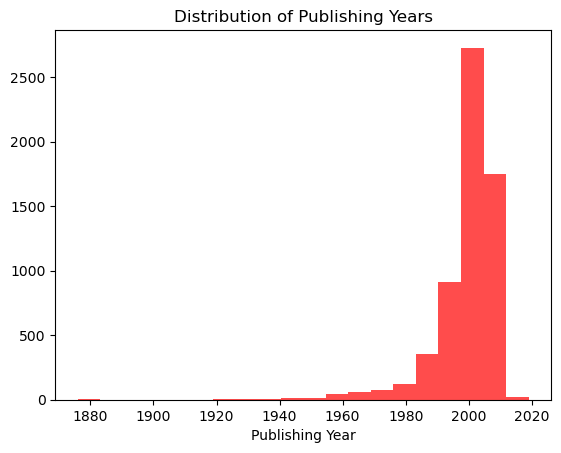

In [38]:
# distribution of publishing years:
plt.hist(books['published_year'], bins=20, color='red', alpha=0.7)
plt.title("Distribution of Publishing Years")
plt.xlabel('Publishing Year')

In [39]:
# Categorize the publishing years into 8 bins: 
pd.cut(books['published_year'],bins=[1870,1880,1900,1920,1940,1960,1980,2000,2020]).value_counts()

published_year
(2000, 2020]    3680
(1980, 2000]    2148
(1960, 1980]     206
(1940, 1960]      56
(1920, 1940]      12
(1870, 1880]       2
(1880, 1900]       0
(1900, 1920]       0
Name: count, dtype: int64

In [40]:
# oldest and recent book in the dataset:
# Sort the dataset by published year:
sorted_books = books.sort_values(by='published_year')
oldest_book = sorted_books.iloc[0]
recent_book = sorted_books.iloc[-1]

print('-'*140)
print(f"The Oldest book in the dataset is: '{oldest_book['title']}' by {oldest_book['authors']} ({oldest_book['published_year']})")
print('-'*140)
print(f"The Most Recent book in the dataset is: '{recent_book['title']}' by {recent_book['authors']} ({recent_book['published_year']})")
print('-'*140)

--------------------------------------------------------------------------------------------------------------------------------------------
The Oldest book in the dataset is: 'Daniel Deronda' by George Eliot (1876)
--------------------------------------------------------------------------------------------------------------------------------------------
The Most Recent book in the dataset is: 'Collections of the Massachusetts Historical Soceity' by Hardpress (2019)
--------------------------------------------------------------------------------------------------------------------------------------------


In [41]:
# Most popular book genre in each decade :
books['decade'] = (books['published_year']//10)*10

In [42]:
books[['published_year','decade']].head(3)

,published_year,decade
0,2003,2000
1,1998,1990
2,1985,1980


In [43]:
# group the books by decades and categories :
genre_popularity = books.groupby(['decade','categories'])['ratings_count'].sum().reset_index()

# sort the books by decades and categories :
most_popular_genres = genre_popularity.sort_values(by= ['decade','ratings_count'],ascending=[True,False])
 
# Keep the top genre for each decade :
top_genre_per_decade = most_popular_genres.groupby('decade').head(1).set_index('decade')
top_genre_per_decade

,categories,ratings_count
decade,,
1870,Fiction,19852
1920,Fiction,115035
1930,Fiction,74568
1940,Fiction,115019
1950,Capitalism,311883
1960,Juvenile Fiction,544393
1970,Boys,911271
1980,Fiction,2512882
1990,Fiction,11035822


In [44]:
# change the category of the book 'The Shinning' by Stephen King:
books.loc[books['title']== 'The Shining','categories'] = ' Psychological horror'

# Run the above code again!

------------------

## Step 4 : Feature Engineering for Recommendation System :

In [526]:
# First make a copy of the books dataframe :
books_fe = books.copy()
books_fe.head(3)

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade
0,310243564,"""A"" is for Abductive: The Language of the Emer...",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17,338,48,2000
1,801435307,"""Gorgias"" and ""Phaedrus"": Rhetoric, Philosophy...",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41,233,15,1990
2,393316041,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard Phillips Feynman;Ralph Leighton,Biography & Autobiography,http://books.google.com/books/content?id=ZRoF9...,The Nobel Prize-winning theoretical physicist ...,1985,4.28,391,105685,1980


## Preprocessing the text data:

In [529]:
# Importing necessary modules for text preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initializing the WordNetLemmatizer to perform lemmatization
lemmatizer = WordNetLemmatizer()

In [531]:
# Clean the title column:
books_fe['title'] = books_fe['title'].apply(lambda x : " ".join(x.split()))

In [533]:
books_fe['title'].head(10)

0    "A" is for Abductive: The Language of the Emer...
1    "Gorgias" and "Phaedrus": Rhetoric, Philosophy...
2    "Surely You're Joking, Mr. Feynman!": Adventur...
3    "What Do You Care what Other People Think?": F...
4                                      $30 Film School
5    'I'm Telling You Stories': Jeanette Winterson ...
6    'Photos of the Gods': The Printed Image and Po...
7                                         'Salem's Lot
8                                       'Tis: A Memoir
9                      , said the shotgun to the head.
Name: title, dtype: object

In [535]:
# Define a cleaning function for authors column:
def clean_authors(text):
    
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Replace semi-colon with colon
    text = text.replace(';',',')
    
    # Step 3: Remove extra spaces
    text = " ".join(text.split())
    
    # Step 4: Split the authors by comma
    text = text.split(',')
    
    return text
    
books_fe['authors'] = books_fe['authors'].apply(clean_authors)

In [537]:
books_fe['authors'].head()

0    [leonard i. sweet, brian d. mclaren, jerry has...
1                                              [plato]
2           [richard phillips feynman, ralph leighton]
3           [richard phillips feynman, ralph leighton]
4                               [michael wareham dean]
Name: authors, dtype: object

In [543]:
# Define a cleaning function for categories column:
def clean_categories(text):
    
    # Step 1: Remove whitespace & Convert to lowercase
    text = text.strip().lower()
    
    #Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Step 3: Remove stopwords
    stop = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop)
    
    # Step 4: Apply lemmatizing
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    # Step 5: Replace specific terms
    replacements = {
        "fictitious character": "fiction",
        "imaginary place": "fiction",
        "imaginary organization": "juvenile fiction",
        "imaginary war battle" : "fiction"
    }
    for old,new in replacements.items():
        text = text.replace(old,new)
    
    return text

books_fe['categories'] = books_fe['categories'].apply(clean_categories)

In [541]:
# Download the NLTK wordnet Dataset for lemmatizing purpose:
import nltk
nltk.download('wordnet')

# Download the NLTK Stopwords Dataset:
import nltk
nltk.download('stopwords')

# Run the above function again.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [545]:
books_fe['categories'].head()

0                   religion
1                 philosophy
2    biography autobiography
3    biography autobiography
4                   computer
Name: categories, dtype: object

In [547]:
# Define a cleaning function for description column:
def clean_description(text):
    # Step 1: Remove whitespace & Convert to lowercase
    text = text.strip().lower()
    
    # Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Step 3: Remove stopwords
    stop = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop)
    
    # Step 4: Apply lemmatizing
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text
books_fe['description'] = books_fe['description'].apply(clean_description)

In [548]:
books_fe['description'][4]

'demonstrating make film help dv camera computer entertaining handbook provides detailed instruction create innovative film budget offer tip distribute promote sell one finished production accompanied cdrom containing sample movie lesson interview trailer useful tool original beginner'

In [549]:
books_fe.head()

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade
0,310243564,"""A"" is for Abductive: The Language of the Emer...","[leonard i. sweet, brian d. mclaren, jerry has...",religion,http://books.google.com/books/content?id=y408k...,abductive b body c carpe manana doublering e e...,2003,3.17,338,48,2000
1,801435307,"""Gorgias"" and ""Phaedrus"": Rhetoric, Philosophy...",[plato],philosophy,http://books.google.com/books/content?id=vBmKQ...,masterful sense place rhetoric thought practic...,1998,4.41,233,15,1990
2,393316041,"""Surely You're Joking, Mr. Feynman!"": Adventur...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=ZRoF9...,nobel prizewinning theoretical physicist talk ...,1985,4.28,391,105685,1980
3,393320928,"""What Do You Care what Other People Think?"": F...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=LUrJI...,twopart profile late nobel prizewinning scient...,2001,4.27,256,15646,2000
4,1592000673,$30 Film School,[michael wareham dean],computer,http://books.google.com/books/content?id=MwSM8...,demonstrating make film help dv camera compute...,2003,3.52,528,29,2000


## Preprocessing the numerical data:

In [554]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [556]:
books_fe[['average_rating','num_pages','ratings_count']] = scaler.fit_transform(books_fe[['average_rating','num_pages','ratings_count']])

In [558]:
books_fe.head()

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade
0,310243564,"""A"" is for Abductive: The Language of the Emer...","[leonard i. sweet, brian d. mclaren, jerry has...",religion,http://books.google.com/books/content?id=y408k...,abductive b body c carpe manana doublering e e...,2003,0.634,0.101137,0.000009,2000
1,801435307,"""Gorgias"" and ""Phaedrus"": Rhetoric, Philosophy...",[plato],philosophy,http://books.google.com/books/content?id=vBmKQ...,masterful sense place rhetoric thought practic...,1998,0.882,0.069719,0.000003,1990
2,393316041,"""Surely You're Joking, Mr. Feynman!"": Adventur...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=ZRoF9...,nobel prizewinning theoretical physicist talk ...,1985,0.856,0.116996,0.018772,1980
3,393320928,"""What Do You Care what Other People Think?"": F...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=LUrJI...,twopart profile late nobel prizewinning scient...,2001,0.854,0.076601,0.002779,2000
4,1592000673,$30 Film School,[michael wareham dean],computer,http://books.google.com/books/content?id=MwSM8...,demonstrating make film help dv camera compute...,2003,0.704,0.157989,0.000005,2000


In [560]:
# Binning published year into two categories "classic" for books before year 2000 and "modern" for books after year 2000:
def categorize_published_year(year):
    if year < 2000:
        return 'classic'
    else:
        return 'modern'

books_fe['published_year'] = books_fe['published_year'].apply(categorize_published_year)

In [562]:
books_fe['published_year'].value_counts()

published_year
modern     4005
classic    2098
Name: count, dtype: int64

In [564]:
books_fe.head()

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade
0,310243564,"""A"" is for Abductive: The Language of the Emer...","[leonard i. sweet, brian d. mclaren, jerry has...",religion,http://books.google.com/books/content?id=y408k...,abductive b body c carpe manana doublering e e...,modern,0.634,0.101137,0.000009,2000
1,801435307,"""Gorgias"" and ""Phaedrus"": Rhetoric, Philosophy...",[plato],philosophy,http://books.google.com/books/content?id=vBmKQ...,masterful sense place rhetoric thought practic...,classic,0.882,0.069719,0.000003,1990
2,393316041,"""Surely You're Joking, Mr. Feynman!"": Adventur...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=ZRoF9...,nobel prizewinning theoretical physicist talk ...,classic,0.856,0.116996,0.018772,1980
3,393320928,"""What Do You Care what Other People Think?"": F...","[richard phillips feynman, ralph leighton]",biography autobiography,http://books.google.com/books/content?id=LUrJI...,twopart profile late nobel prizewinning scient...,modern,0.854,0.076601,0.002779,2000
4,1592000673,$30 Film School,[michael wareham dean],computer,http://books.google.com/books/content?id=MwSM8...,demonstrating make film help dv camera compute...,modern,0.704,0.157989,0.000005,2000


In [566]:
books_fe.shape

(6103, 11)

In [568]:
# Let's save this preprocessed data:
books_fe.to_csv('preprocessed_data.csv',index= False)

In [570]:
books_fe = pd.read_csv('preprocessed_data.csv')

### Convert the cleaned text data into numerical representation:

In [572]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initalize the module:
tf_idf = TfidfVectorizer()

In [574]:
books_fe.dtypes

isbn10             object
title              object
authors            object
categories         object
thumbnail          object
description        object
published_year     object
average_rating    float64
num_pages         float64
ratings_count     float64
decade              int64
dtype: object

In [576]:
# drop null values (if there are any) :
books_fe = books_fe.dropna()

In [578]:
books_fe.isnull().sum()

isbn10            0
title             0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
decade            0
dtype: int64

In [646]:
tf_idf_title = TfidfVectorizer().fit_transform(books_fe['title'])
tf_idf_authors = TfidfVectorizer().fit_transform(books_fe['authors'])
tf_idf_categories = TfidfVectorizer().fit_transform(books_fe['categories'])
tf_idf_desc = TfidfVectorizer().fit_transform(books_fe['description'])

In [648]:
from sklearn.metrics.pairwise import cosine_similarity

In [650]:
sim_title = cosine_similarity(tf_idf_title)
sim_authors = cosine_similarity(tf_idf_authors)
sim_categories = cosine_similarity(tf_idf_categories)
sim_desc = cosine_similarity(tf_idf_desc)

In [652]:
# Weighted Combination:
combined_similarity = 0.2 * sim_authors + 0.5 * sim_categories + 0.3 * sim_desc

--------------

# Step 5: Builing a recommender System:

In [756]:
# Build a recomender system :
def book_rec_v1(title,sim_score = combined_similarity,df=books_fe):

    # Find the index of the book
    idx = books_fe[books_fe['title'] == title].index[0]

    # Get similarity scores for all books with the input book
    sim_scores = list(enumerate(combined_similarity[idx, :]))

    # Exclude the input book from recommendations
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Sort the books by similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1],reverse= True)

    # Get the indices of the top 10 most similar books
    sim_indices = [i[0] for i in sim_scores[:10]]

     # Return the titles of the recommended books
    return books_fe[['title','authors','ratings_count']].iloc[sim_indices]

In [698]:
print(combined_similarity.shape)
print(books_fe.shape)

(6100, 6100)
(6100, 11)


In [700]:
title = "Harry Potter and the Sorcerer's Stone (Book 1)"

In [702]:
recommended_books = book_rec_v1(title)
recommended_books

,title,authors
1762,Harry Potter and the Chamber of Secrets (Book 2),"['rowling', ' j.k.']"
1764,Harry Potter and the Half-Blood Prince (Book 6),"['rowling', ' j.k.']"
1767,Harry Potter and the Prisoner of Azkaban (Book 3),"['rowling', ' j.k.']"
1765,Harry Potter and the Order of the Phoenix (Boo...,"['rowling', ' j.k.']"
1761,Harry Potter and the Chamber of Secrets,"['j. k. rowling', 'mary grandpre']"
1763,Harry Potter and the Goblet of Fire,['j. k. rowling']
1769,"Harry Potter: 5 Years of Magic, Adventure, and...",['j. k. rowling']
4538,The Harry Potter Collection: The First Six Spe...,['j. k. rowling']
4219,The Cricket in Times Square,['george selden']
1137,Diary of a Spider,['doreen cronin']


In [692]:
books_fe[books_fe['title'] == "Romeo and Juliet"]

,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade
3284,743477111,Romeo and Juliet,['william shakespeare'],drama,http://books.google.com/books/content?id=1cEsN...,offer explanatory note page facing text play w...,classic,0.748,0.084680,0.321720,1990
3285,743482808,Romeo and Juliet,"['william shakespeare', 'barbara a. mowat', 'p...",drama,http://books.google.com/books/content?id=ZF0U9...,offer explanatory note page facing text play w...,modern,0.748,0.084081,0.000052,2000


In [704]:
recommended_books = book_rec_v1("Romeo and Juliet")
recommended_books

,title,authors
2446,Macbeth,['william shakespeare']
3285,Romeo and Juliet,"['william shakespeare', 'barbara a. mowat', 'p..."
126,A Midsummer Night's Dream,['william shakespeare']
5738,Twelfth Night,['william shakespeare']
4827,The Merchant of Venice,['william shakespeare']
5740,"Twelfth Night, Or, What You Will: Modern Engli...",['william shakespeare']
2939,Othello,['william shakespeare']
5346,The Tempest,['william shakespeare']
2447,Macbeth,"['william shakespeare', 'dr. barbara a. mowat'..."
5969,William Shakespeare: The Complete Works,['william shakespeare']


In [706]:
recommended_books = book_rec_v1("The Alchemist")
recommended_books

,title,authors
3856,The Alchemist - Gift Edition,['paulo coelho']
5864,Warrior of the Light: A Manual,['paulo coelho']
699,By the River Piedra I Sat Down and Wept: A Nov...,['paulo coelho']
5003,The Pilgrimage,"['paulo coelho', 'alan r. clarke']"
4603,The Illustrated Alchemist: A Fable About Follo...,"['paulo coelho', 'alan r. clarke', 'moebius']"
4278,The Devil and Miss Prym: A Novel of Temptation,['paulo coelho']
1301,Eleven Minutes: A Novel,['paulo coelho']
5814,Veronika Decides to Die: A Novel of Redemption,['paulo coelho']
4409,The Fifth Mountain,['paulo coelho']
1790,Heart of the Sea,['nora roberts']


In [668]:
books_fe['description'].iloc[5864]

'warrior light manual inspirational companion alchemist international bestseller beguiled million reader around world every short passage invite u live dream embrace uncertainty life rise unique destiny inimitable style paulo coelho help bring warrior light within u also show reader embark upon way warrior one appreciates miracle alive one accepts failure one whose quest lead become person want paulo coelho one beloved storyteller time longawaited companion first novel coelho present collection philosophical story delight guide seeker everywhere'

In [708]:
recommended_books = book_rec_v1("Rage of angels")
recommended_books

,title,authors
5264,The Sky Is Falling,['sidney sheldon']
2833,Nothing Lasts Forever,['sidney sheldon']
3791,Tell Me Your Dreams,['sidney sheldon']
4122,The Client,['john grisham']
12,10 Lb. Penalty,['dick francis']
2851,Odalisque: The Baroque Cycle #3,['neal stephenson']
4315,The Dragon Reborn: Book Three of 'The Wheel of...,['robert jordan']
983,Crime Partners,['donald goines']
1759,"Harry Bosch Novels, The: Volume 2: The Last Co...",['michael connelly']
511,Beauty and Sadness,['yasunari kawabata']


In [642]:
books_fe = books_fe.reset_index(drop=True)  # Resets the index to default integers

In [686]:
books_fe['description'].iloc[12]

'entering political arena trusted confidant politician father exjockey benedict juliard find target vicious attack father dangerous enemy assault could destroy reputation father prospective prime minister reissue'

In [710]:
recommended_books = book_rec_v1("The Great Gatsby")
recommended_books

,title,authors
5241,The Short Stories of F. Scott Fitzgerald: A Ne...,['f. scott fitzgerald']
1479,Fitzgerald: All The Sad Young Men,['f. scott fitzgerald']
4979,The Pat Hobby Stories,['f. scott fitzgerald']
2746,Narcissus and Goldmund,['hermann hesse']
2345,Like Water for Chocolate: A Novel in Monthly I...,['laura esquivel']
3800,Tender is the Night,['f. scott fitzgerald']
4767,The Love of the Last Tycoon: The Authorized Text,['f. scott fitzgerald']
1454,Filth: A Novel,['irvine welsh']
4579,The Hour Before Dark,['douglas clegg']
5266,The Sleeping Doll,['jeffery deaver']


# Version 2:

In [ ]:
# Assign more weight to book's description :
# Weighted Combination:
new_combined_similarity = 0.1 * sim_authors + 0.3 * sim_categories + 0.6 * sim_desc

In [ ]:
# Build a recomender system :
def book_rec_v2(title,sim_score = new_combined_similarity,df=books_fe):

    # Find the index of the book
    idx = books_fe[books_fe['title'] == title].index[0]

    # Get similarity scores for all books with the input book
    sim_scores = list(enumerate(new_combined_similarity[idx, :]))

    # Exclude the input book from recommendations
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Sort the books by similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1],reverse= True)

    # Get the indices of the top 10 most similar books
    sim_indices = [i[0] for i in sim_scores[:10]]

     # Return the titles of the recommended books
    return books_fe[['title','authors','ratings_count']].iloc[sim_indices]

In [ ]:
recommended_books = book_rec_v2("Harry Potter and the Sorcerer's Stone (Book 1)")
recommended_books

In [ ]:
recommended_books = book_rec_v2("Romeo and Juliet")
recommended_books

In [ ]:
recommended_books = book_rec_v2("The Alchemist")
recommended_books

In [ ]:
recommended_books = book_rec_v2("Rage of angels")
recommended_books

In [ ]:
recommended_books = book_rec_v2("The Great Gatsby")
recommended_books

In [ ]:
recommended_books = book_rec_v2("Gilead")
recommended_books

## Version 2 of our book recommender system is working effectively!!

----------------------------------------------------------------------

# Step 6 : Conclusion:

### The primary goal of this project was to develop a personalized book recommendation system that provides users with suggestions based on various attributes such as authors, categories, descriptions, and ratings. The system aims to simplify the process of discovering books similar to a user's preferences.

### Major challenges encountered during the project:
### 1. One challenge was ensuring that the system did not recommend the input book itself, which was addressed by excluding the input book index from recommendations."
### 2. Balancing the weights of text similarity and numerical features like ratings_count required iterative testing and fine-tuning to achieve optimal results."

### This recommendation system bridges the gap between users and books, helping readers discover new titles based on their preferences while promoting books that might otherwise be overlooked.

### This project demonstrates the effectiveness of combining content-based and numerical feature-based techniques for book recommendations. With future enhancements, this system can serve as a robust foundation for personalized book discovery.

---------------------------------------------------------------------------------------------------------------------------------------------